In [1]:
import pandas as pd
import warnings
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import DBSCAN



In [2]:
# Read the CSV file specifying the index column by name
df = pd.read_csv("data/processed_cust_data.csv", index_col='Unnamed: 0')
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,312.343947,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [3]:
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [22]:
sclar = StandardScaler()
scaled_data = sclar.fit_transform(df)
scaled_data

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.3024    ,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.09749953,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.0932934 ,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.32687479,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.33830497,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.3243581 ,
        -0.52555097, -4.12276757]])

### only kmeans clustering 

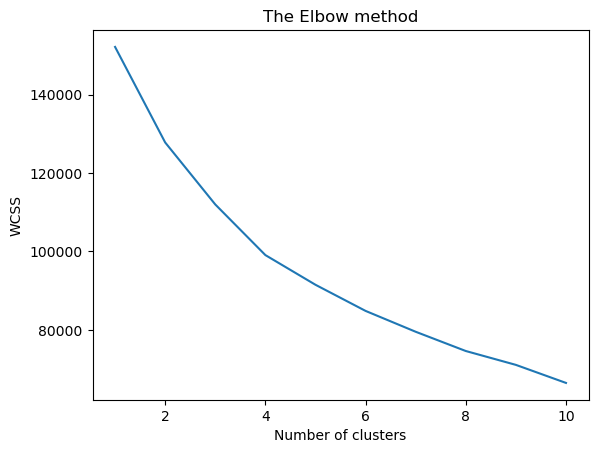

In [5]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state =42)
    kmeans.fit(scaled_data)
    # add the sum of squared distance between each data poing in cluster and its centroid
    wcss.append(kmeans.inertia_)


plt.plot(range(1,11), wcss, )
plt.title("The Elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [6]:
clusterer = KMeans(n_clusters=4, random_state=42)
cluster_labels = clusterer.fit_predict(scaled_data)
cluster_labels

array([2, 1, 0, ..., 0, 2, 2])

In [7]:
#silhouette score is near to the 1 shows good model and if it is neear to the 0 model prediction not good
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(scaled_data, cluster_labels)
silhouette_avg
print(f"4 clusters silhouette score : {silhouette_avg}")

4 clusters silhouette score : 0.19767817470513593


### PCA (Principal Components analysis) 
#### Dimensionality Reduction
### for visualization purpose

In [8]:
# PCA is used for capturing the maximum variance and visualization
pca = PCA(n_components= 2)
principal_comp = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(principal_comp, columns = ["PCA1", "PCA2"])
pca_df

,PCA1,PCA2
0,-1.683625,-1.072300
1,-1.134175,2.509099
2,0.969364,-0.383587
3,-0.888250,0.004620
4,-1.600011,-0.683859
...,...,...
8945,-0.362482,-2.013397
8946,-0.580726,-1.675627
8947,-0.928897,-1.808014
8948,-2.337778,-0.653602


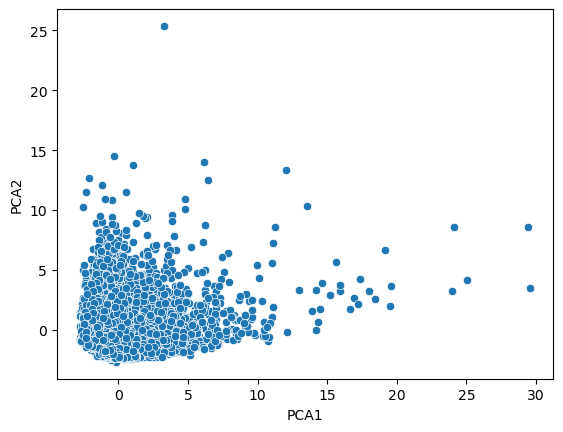

In [9]:
sns.scatterplot(data=pca_df, x = "PCA1", y = "PCA2",)
plt.show()

## KMeans Cluster Analysis

In [10]:
range_n_clusters = [2, 3, 4, 5, 6]
for i in range_n_clusters:
    kmeans = KMeans(n_clusters = i , random_state = 42)
    clusters_labels = kmeans.fit_predict(scaled_data)
    silhouette_avg = silhouette_score(pca_df, clusters_labels)
    print(f"{i} clusters silhouette score : {silhouette_avg}")

2 clusters silhouette score : 0.3595265280412175
3 clusters silhouette score : 0.4517743921646054
4 clusters silhouette score : 0.3844679952330573
5 clusters silhouette score : 0.31073683343214126
6 clusters silhouette score : 0.19005333085700446


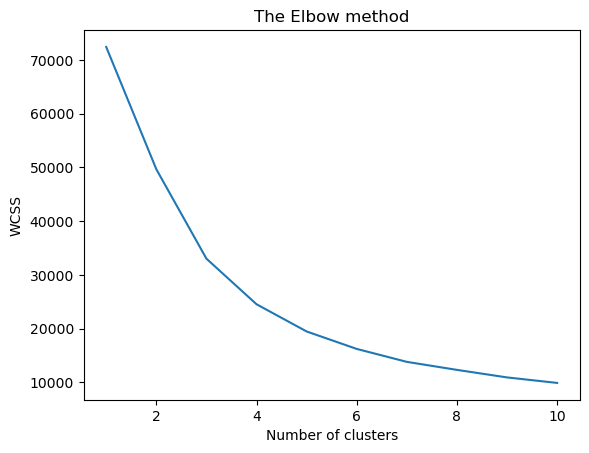

2 clusters silhouette score : 0.3595265280412175
3 clusters silhouette score : 0.4517743921646054
4 clusters silhouette score : 0.3844679952330573
5 clusters silhouette score : 0.31073683343214126
6 clusters silhouette score : 0.19005333085700446


In [13]:
# check the silhouette score on pca_df which is already scaled 
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state =42)
    kmeans.fit(pca_df)
    # add the sum of squared distance between each data poing in cluster and its centroid
    wcss.append(kmeans.inertia_)


plt.plot(range(1,11), wcss)
plt.title("The Elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

range_n_clusters = [2, 3, 4, 5, 6]
for i in range_n_clusters:
    kmeans = KMeans(n_clusters = i , random_state = 42)
    clusters_labels = kmeans.fit_predict(scaled_data)
    silhouette_avg = silhouette_score(pca_df, clusters_labels)
    print(f"{i} clusters silhouette score : {silhouette_avg}")

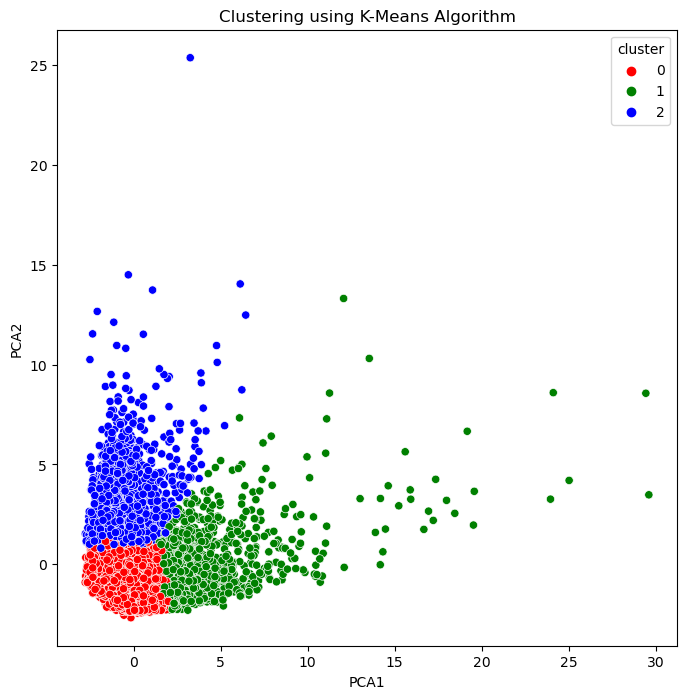

In [14]:
# Running the model with 4 clusters
kmeans_model=KMeans(3)
kmeans_model.fit_predict(scaled_data)
pca_df_kmeans= pd.concat([pca_df,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="PCA1",y="PCA2",hue="cluster",data=pca_df_kmeans,palette=['red','green', 'blue'])
plt.title("Clustering using K-Means Algorithm")
plt.show()

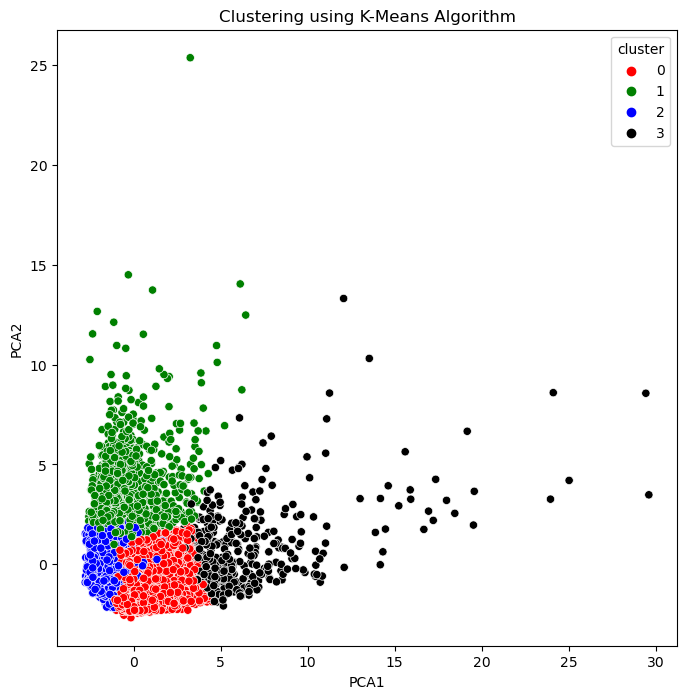

In [32]:
# Running the model with 4 clusters
kmeans_model=KMeans(4 , random_state= 42)
kmeans_model.fit_predict(scaled_data)
pca_df_kmeans= pd.concat([pca_df,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="PCA1",y="PCA2",hue="cluster",data=pca_df_kmeans,palette=['red','green', 'blue', 'black'])
plt.title("Clustering using K-Means Algorithm")
plt.show()

In [33]:
pca_df_kmeans

,PCA1,PCA2,cluster
0,-1.683625,-1.072300,2
1,-1.134175,2.509099,1
2,0.969364,-0.383587,0
3,-0.888250,0.004620,2
4,-1.600011,-0.683859,2
...,...,...,...
8945,-0.362482,-2.013397,0
8946,-0.580726,-1.675627,0
8947,-0.928897,-1.808014,0
8948,-2.337778,-0.653602,2


In [34]:
# Returns the co - ordinate of the cluster centers in an array
kmeans_model.cluster_centers_

array([[-3.21688457e-01,  2.42573999e-01,  1.09043960e-01,
         9.26320814e-04,  2.55903798e-01, -3.66372614e-01,
         9.83720816e-01,  3.17152671e-01,  8.74137767e-01,
        -4.62598760e-01, -3.60303396e-01,  2.96985169e-01,
        -7.72980064e-02, -1.38501975e-01, -8.79808174e-02,
         3.95041454e-01,  5.77439285e-02],
       [ 1.45957148e+00,  3.84641678e-01, -2.34653983e-01,
        -1.64025403e-01, -2.53579197e-01,  1.68934647e+00,
        -5.04595569e-01, -2.13016767e-01, -4.49811274e-01,
         1.74727505e+00,  1.61864704e+00, -2.83389418e-01,
         8.38748831e-01,  6.04825432e-01,  4.96757651e-01,
        -4.06267712e-01, -9.75285009e-02],
       [-2.65115964e-01, -3.68721257e-01, -3.43158324e-01,
        -2.30450164e-01, -3.87814902e-01, -1.82333186e-01,
        -7.97824784e-01, -3.89369186e-01, -7.14296741e-01,
        -1.01435270e-01, -1.64611907e-01, -4.74996595e-01,
        -3.34056209e-01, -2.62144899e-01, -1.24752887e-01,
        -2.58932759e-01, -5.2

## Unsupervised ML to Supervised ML
### conveting clustering problem to Multiclass classification problem

In [35]:
# Returns the co - ordinate of the cluster centers but in dataframe
cluster_centers = pd.DataFrame(data= kmeans_model.cluster_centers_, columns= [df.columns])
# inverse the scaled data to previous values data
cluster_centers = sclar.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(cluster_centers, columns= [df.columns])
cluster_centers


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,894.907458,0.934734,1236.178934,593.974874,642.478274,210.570626,0.885165,0.297070,0.711842,0.042573,0.790021,22.091773,4213.207678,1332.194205,639.677258,0.269258,11.594595
1,4602.449658,0.968389,501.862982,320.188797,181.759123,4521.509581,0.287832,0.138911,0.185671,0.484792,14.294904,7.665831,7546.160857,3484.054216,2003.674460,0.034888,11.386800
2,1012.658327,0.789924,270.041785,209.937299,60.371441,596.509903,0.170145,0.086301,0.080558,0.114846,2.125471,2.903193,3279.016289,974.260054,553.900449,0.077981,11.446568
3,3551.153761,0.986879,7681.620098,5095.878826,2587.208264,653.638891,0.946418,0.739031,0.788060,0.071290,2.085575,89.359413,9696.943765,7288.739497,1972.767288,0.286707,11.951100


### creating a Target column 
### The cluster problem is getting converted to multiclass classification problems

In [36]:
# Creating a target column "Cluster" for storing the cluster segment
cluster_df = pd.concat([df,pd.DataFrame({'Cluster':kmeans_model.labels_})],axis=1)
cluster_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,0
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,312.343947,0.000000,6,0
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,0
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,2


In [37]:
cluster_1_df = cluster_df[cluster_df["Cluster"]==0]
cluster_2_df = cluster_df[cluster_df["Cluster"]==1]
cluster_3_df = cluster_df[cluster_df["Cluster"]==2]
cluster_4_df = cluster_df[cluster_df["Cluster"]==3]

In [44]:
# Assuming you have a DataFrame called cluster_df with a "Cluster" column

# Use groupby to group the data by the "Cluster" column and then count the number of data points in each group
cluster_counts = cluster_df.groupby("Cluster").size().reset_index(name='Count')
cluster_counts

# The 'Count' column in cluster_counts now contains the number of data points in each cluster


,Cluster,Count
0,0,3367
1,1,1197
2,2,3977
3,3,409


<AxesSubplot:xlabel='Cluster', ylabel='count'>

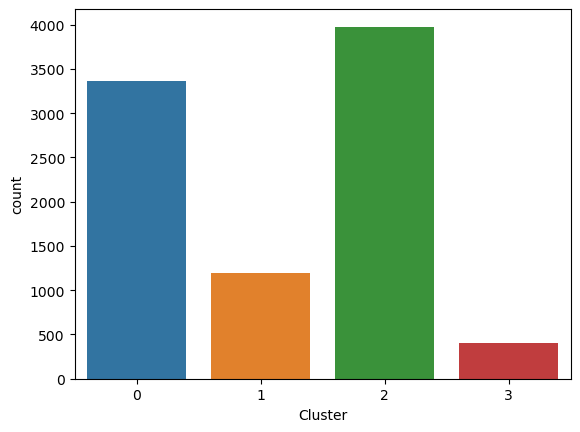

In [38]:
#Visualization
sns.countplot(x='Cluster', data=cluster_df)

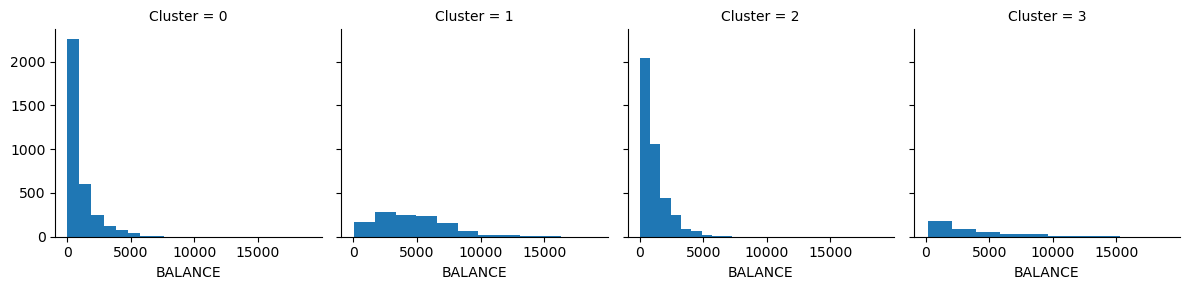

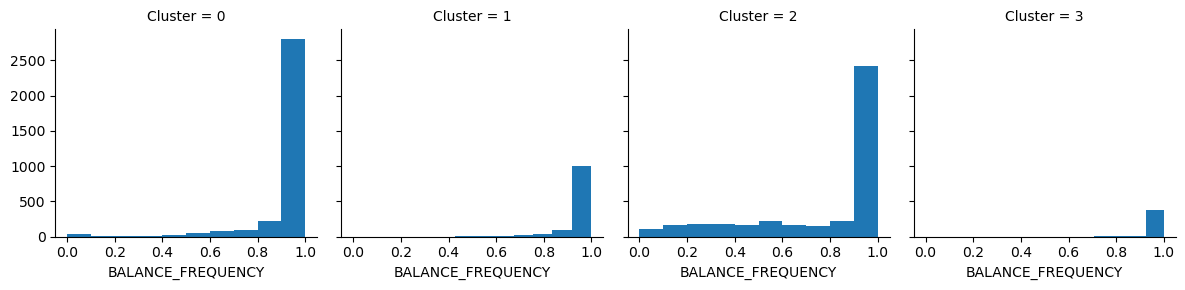

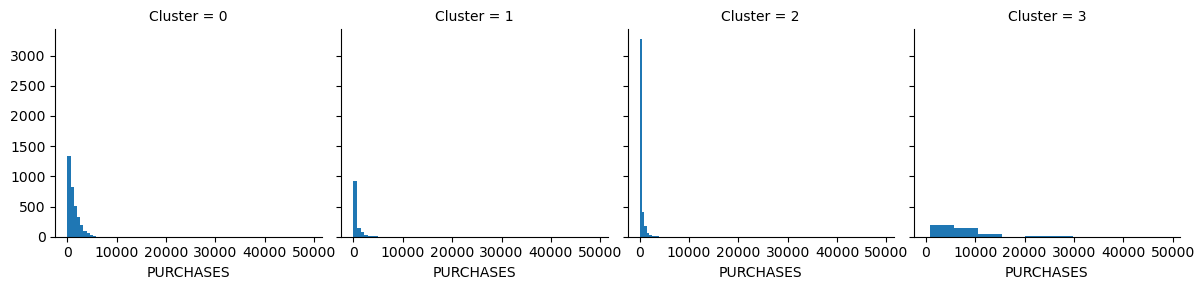

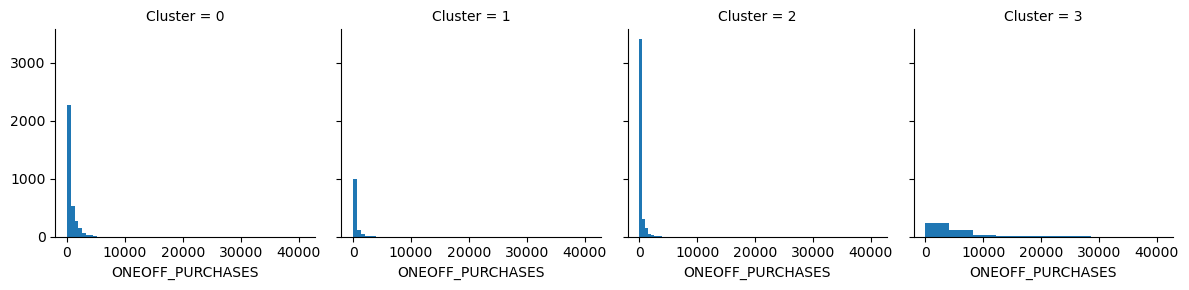

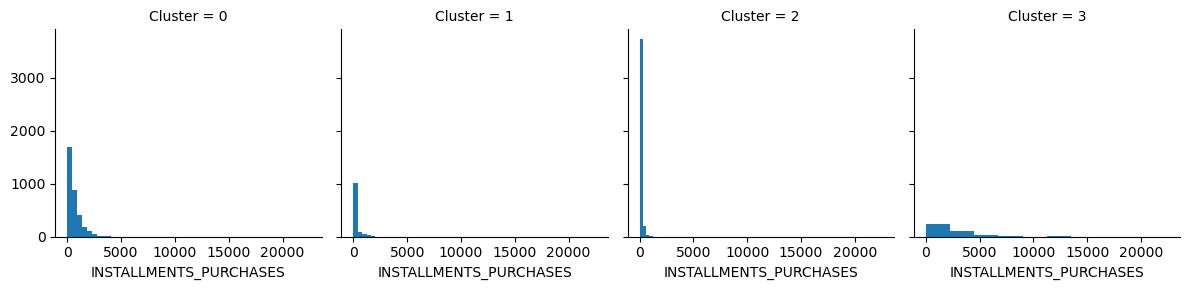

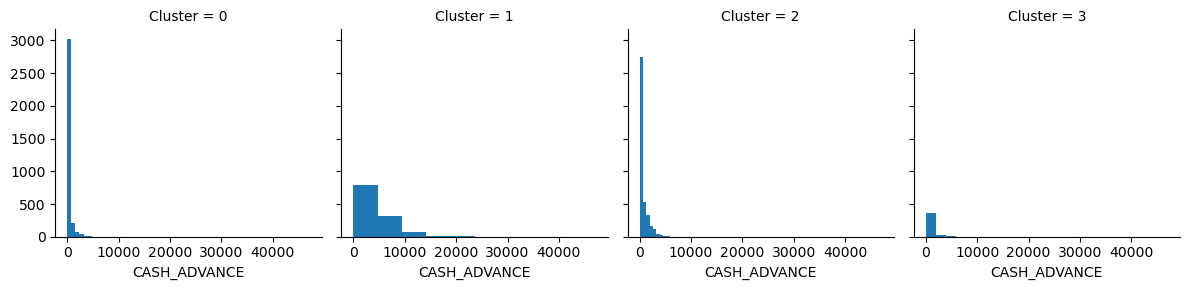

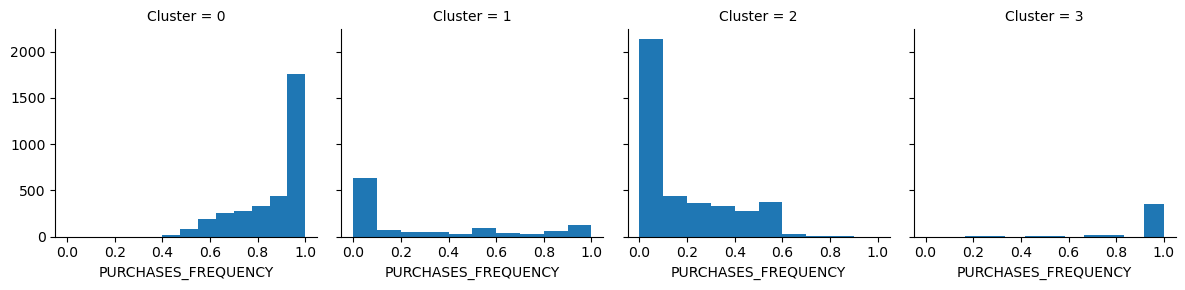

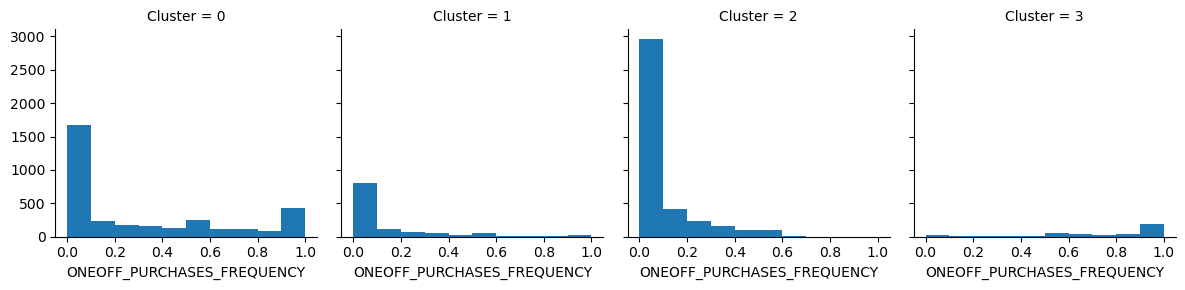

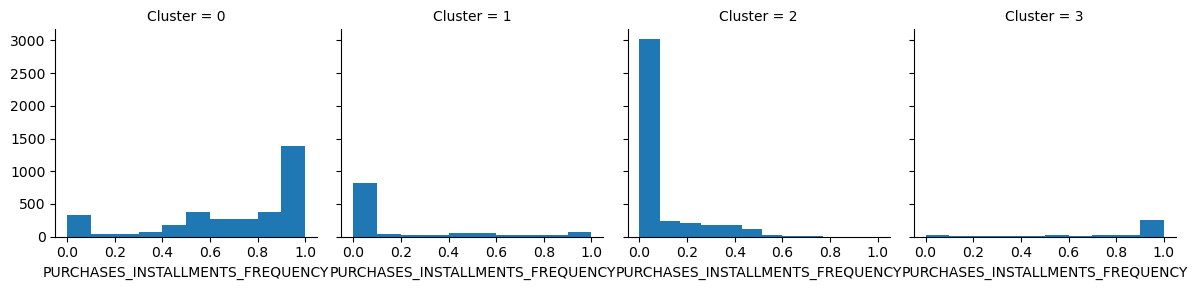

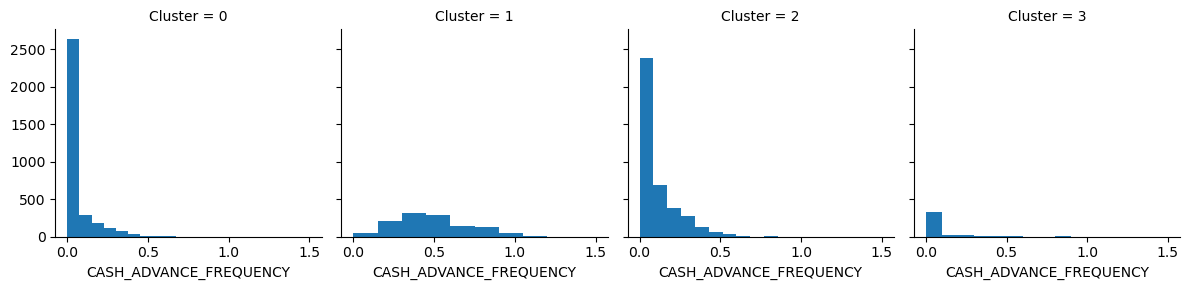

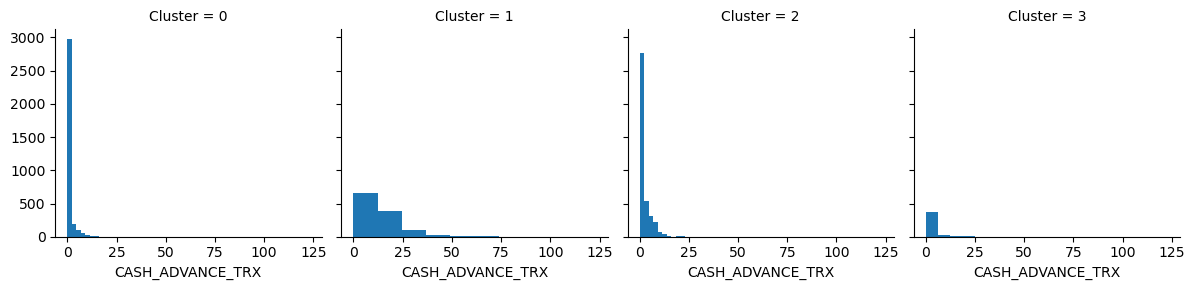

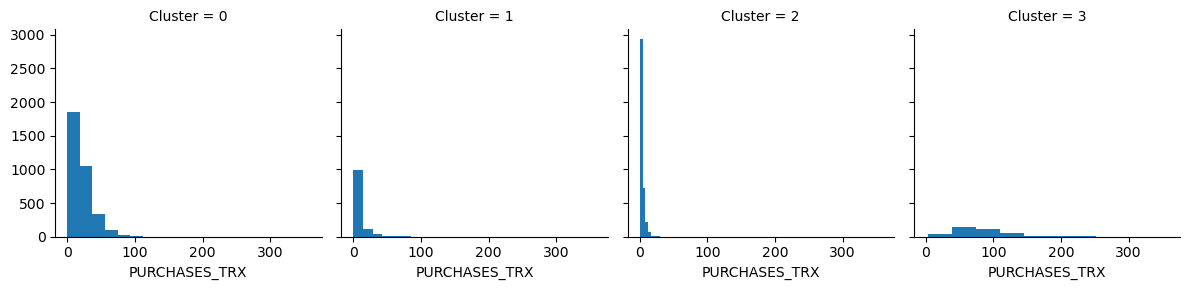

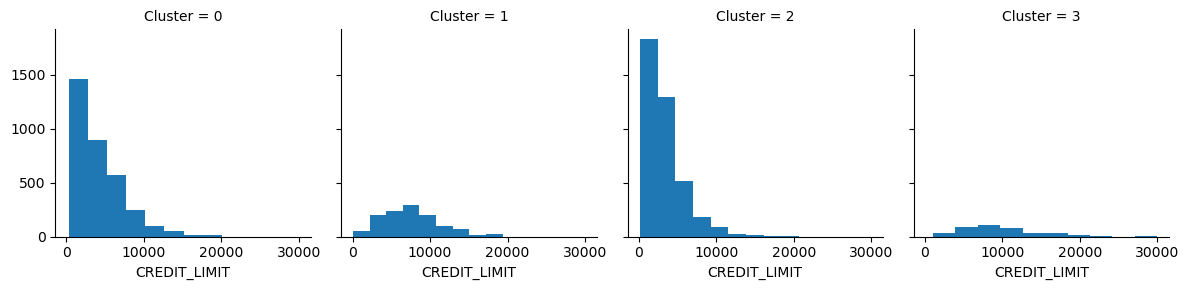

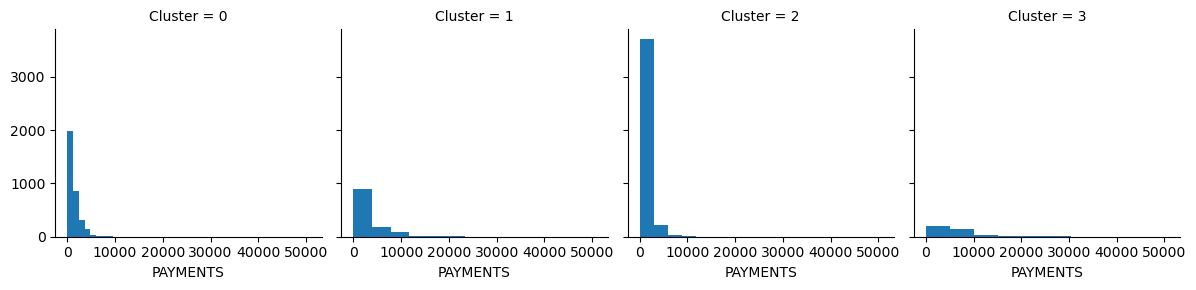

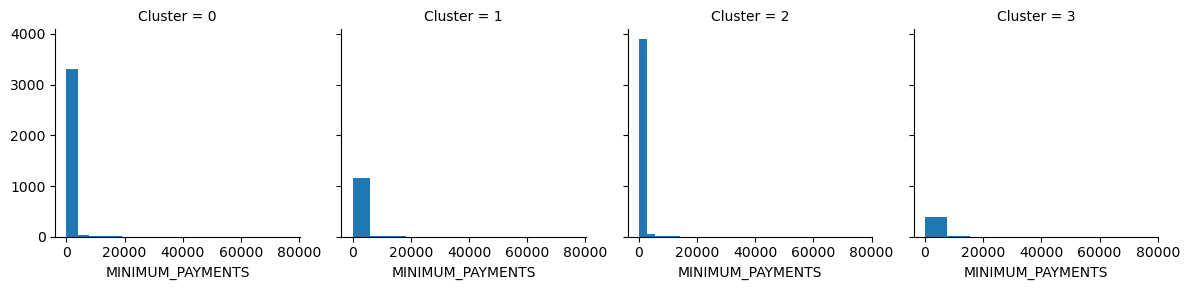

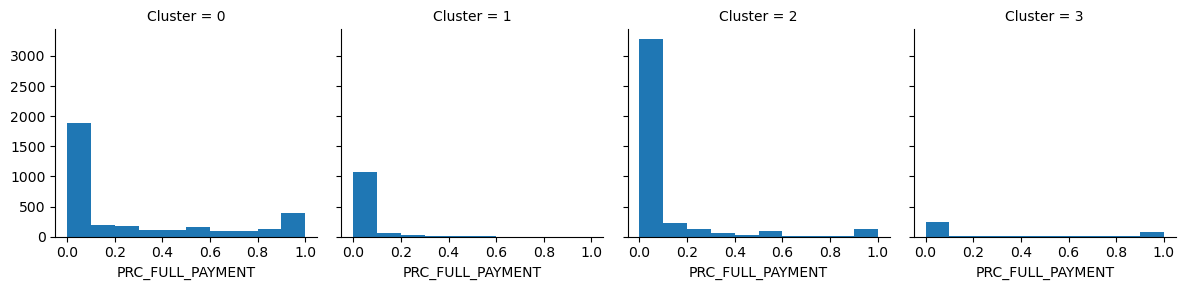

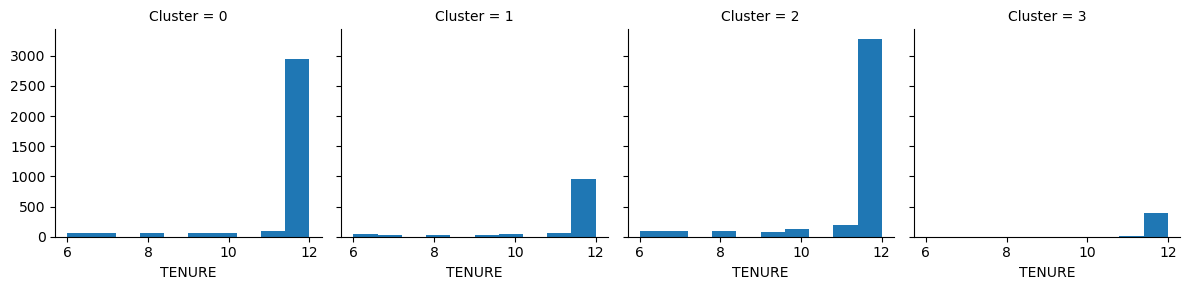

In [50]:
# data distribution of the customers based on the cluster
# if a customer is having the less amout of of balance distrbution then he will be lie in the cluster 2
for c in cluster_df.drop(['Cluster'],axis=1):
    grid= sns.FacetGrid(cluster_df, col='Cluster')
    grid= grid.map(plt.hist, c)   
plt.show()

## Hyperparameter Tuning with KMeans Clusting

In [ ]:
warnings.filterwarnings('ignore')
param_grid = {
    'n_clusters': [2, 3, 4, 5],
    'init': ['k-means++', 'random'],
    'max_iter': [100, 300, 500],
    'tol': [1e-4, 1e-5, 1e-6]
}

kmeans = KMeans()
grid_search = GridSearchCV(estimator=kmeans, param_grid=param_grid, scoring= silhouette_score, cv=5)
grid_search.fit(scaled_data)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Silhouette Score:", grid_search.best_score_)


Best Hyperparameters: {'init': 'k-means++', 'max_iter': 100, 'n_clusters': 2, 'tol': 0.0001}
Best Silhouette Score: nan


In [ ]:
kmeans = KMeans(init='k-means++', max_iter=100, n_clusters=2, tol=0.0001)
clusters_labels = kmeans.fit_predict(scaled_data)
silhouette_avg = silhouette_score(pca_df, clusters_labels)
print(f" 2 clusters silhouette score : {silhouette_avg}")

 2 clusters silhouette score : 0.35976650091723616


## DBSCAN Analysis
#### (Robust to outlier)

In [ ]:
# -1 label is noise point
dbscan = DBSCAN(eps=0.65, min_samples=4)
model = dbscan.fit(pca_df)
labels =model.labels_
# convert all values into zero and false simultaneously of an array
sample_cores = np.zeros_like(labels, dtype= bool)
sample_cores[dbscan.core_sample_indices_] = True
# give number of clusters exclusing noise clusters
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(silhouette_score(pca_df, labels))


0.5861528021295299


In [ ]:
print(n_clusters)
print(pca_df_dbscan["cluster"].unique())

3
[ 0 -1  1  2]


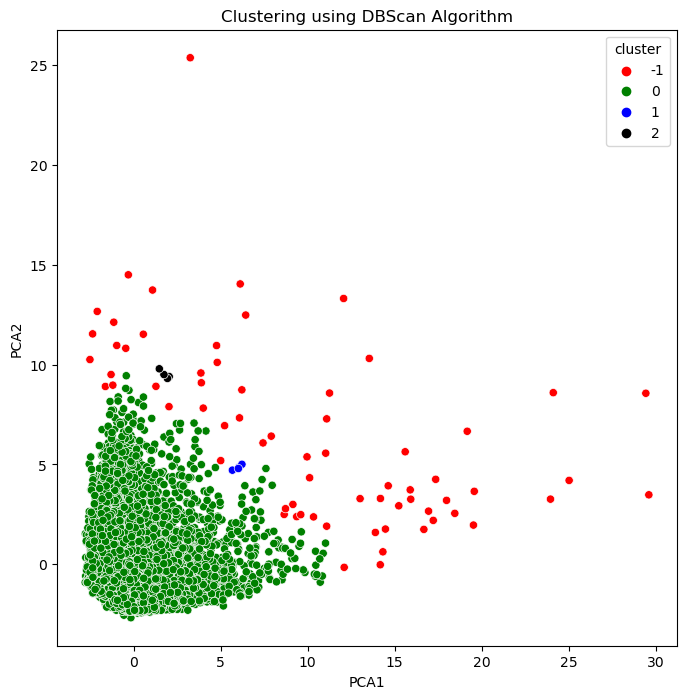

In [ ]:

dbscan.fit_predict(pca_df)
pca_df_dbscan= pd.concat([pca_df,pd.DataFrame({'cluster':dbscan.labels_})],axis=1)
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="PCA1",y="PCA2",hue="cluster",data=pca_df_dbscan,palette=['red','green', 'blue', 'black'])
plt.title("Clustering using DBScan Algorithm")
plt.show()

13